In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import *

In [2]:
# Loading tha mnist dataset, which contains handwritten digits data 
(x_tr,y_tr),(x_ts,y_ts)=keras.datasets.mnist.load_data()

In [3]:
x_tr.shape

(60000, 28, 28)

In [4]:
x_ts.shape

(10000, 28, 28)

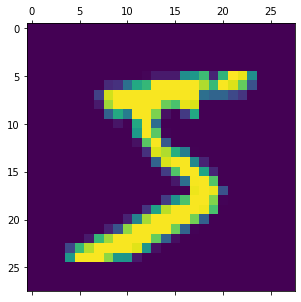

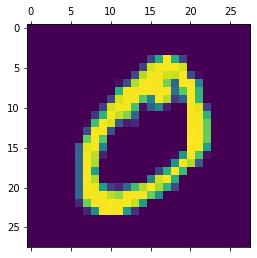

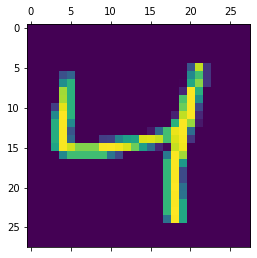

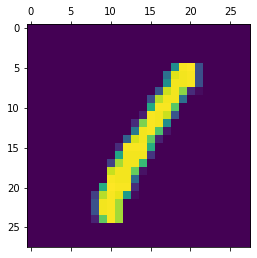

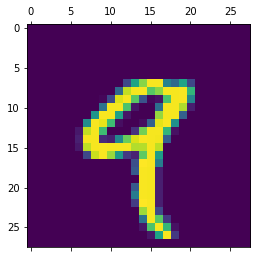

In [5]:
for i in range(5):
    plt.matshow(x_tr[i])

In [6]:
for i in range(5):
    print(y_tr[i])

5
0
4
1
9


In [7]:
# scalling the input data

x_tr=x_tr/255
x_ts=x_ts/255

In [8]:
# flating input data

x_tr_flat=x_tr.reshape(len(x_tr),28*28)
x_ts_flat=x_ts.reshape(len(x_ts),28*28)

In [9]:
x_tr_flat.shape, x_tr_flat.shape

((60000, 784), (60000, 784))

# neural network with no hidden layers

In [10]:
#creating the model's class
model=keras.Sequential()

In [11]:
model

In [12]:
# design the model

model.add(layers.Dense(10,input_shape=(784,), activation='sigmoid' ))

In [13]:
# compile the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train / apply the model on data
model.fit(x_tr_flat,y_tr, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4695 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [15]:
# evaluate the model for testing

model.evaluate(x_ts_flat,y_ts)

313/313 [==============================] - 1s 3ms/step - loss: 0.2688 - accuracy: 0.9249


[0.26884859800338745, 0.9248999953269958]

In [16]:
y_pred=model.predict(x_ts_flat)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred[3]

array([9.9946153e-01, 1.4590791e-08, 7.1632639e-02, 3.4134162e-03,
       2.3832039e-05, 4.5916088e-02, 8.7303929e-02, 7.4279858e-03,
       2.0897370e-02, 1.1629194e-02], dtype=float32)

In [18]:
np.argmax(y_pred[3])

0

In [19]:
y_ts[3]

0

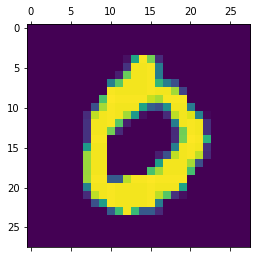

In [20]:
plt.matshow(x_ts[3])

In [21]:
# extracting the maximun vote/ % result

y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:5]

[7, 2, 1, 0, 4]

In [22]:
# creating the confusion matrices

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [23]:
c_mat=confusion_matrix(y_ts,y_predicted)

In [24]:
c_mat

array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  919,   16,    6,    1,   13,   10,   45,    4],
       [   4,    0,   18,  923,    0,   20,    3,   10,   25,    7],
       [   1,    1,    6,    1,  911,    0,   11,    4,   13,   34],
       [  11,    3,    3,   41,    9,  755,   15,    7,   42,    6],
       [  11,    3,    6,    1,    7,    7,  917,    2,    4,    0],
       [   1,    5,   21,    7,    7,    1,    0,  940,    6,   40],
       [   6,    7,    6,   17,    9,   17,    9,    9,  889,    5],
       [  11,    7,    1,   12,   27,    6,    0,   16,   11,  918]],
      dtype=int64)

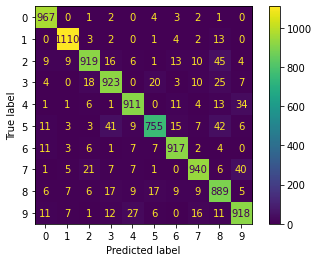

In [25]:
disp=ConfusionMatrixDisplay(c_mat)
disp.plot()

# now trying create neural network with hidden layers

In [26]:
# initialize the model

model_h=keras.Sequential()

In [27]:
# design the model

model_h.add(layers.Dense(100, input_shape=(784,), activation='relu'))  # a hidden layer
model_h.add(layers.Dense(10,activation='sigmoid'))

In [28]:
# compile the model

model_h.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
# apply/train the model

model_h.fit(x_tr_flat,y_tr,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2668 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1194 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0844 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0503 - accuracy: 0.9844


In [30]:
# evaluate for testing

model_h.evaluate(x_ts_flat,y_ts)

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9764


[0.07695586234331131, 0.9764000177383423]

In [31]:
y_pred=model_h.predict(x_ts_flat)

313/313 [==============================] - 1s 2ms/step


In [32]:
# extract the prediction value
y_prediction=[np.argmax(i) for i in y_pred]
y_prediction[:5]

[7, 2, 1, 0, 4]

In [33]:
# confusion matrices

cm=confusion_matrix(y_ts,y_prediction)
cm

array([[ 967,    0,    1,    2,    1,    1,    3,    1,    2,    2],
       [   0, 1126,    4,    1,    0,    1,    1,    0,    2,    0],
       [   4,    0, 1013,    2,    4,    0,    2,    2,    4,    1],
       [   0,    0,    5,  999,    1,    0,    0,    2,    3,    0],
       [   0,    0,    4,    0,  971,    0,    2,    1,    0,    4],
       [   2,    0,    1,   19,    1,  858,    4,    1,    3,    3],
       [   2,    2,    1,    2,    5,    1,  940,    0,    5,    0],
       [   0,    5,   10,   13,    4,    0,    0,  986,    1,    9],
       [   3,    1,    6,   12,    5,    5,    2,    2,  936,    2],
       [   1,    6,    1,    9,   16,    1,    0,    5,    2,  968]],
      dtype=int64)

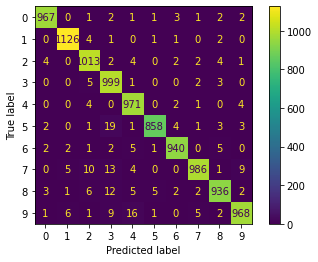

In [34]:
disp=ConfusionMatrixDisplay(cm)
disp.plot()